<a href="https://colab.research.google.com/github/git933/Machine-Learning/blob/main/07_simple_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TV 마케팅 비용 대비 매출에 대한 예측

1. pandas를 이용한 데이터 탐색

2. 데이터프레임 구조에 대한 이해

In [1]:
import pandas as pd
import numpy as np
import warnings

advertising = pd.read_csv("/content/drive/MyDrive/MachineLearning_class/고우주-1일차_실습코드/02_Regression/data/tvmarketing.csv")
advertising.head()  # first 5 rows

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [2]:
advertising.tail()  # last 5 rows

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [3]:
advertising.shape

(200, 2)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [5]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


# seaborn을 이용한 시각화

In [6]:
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


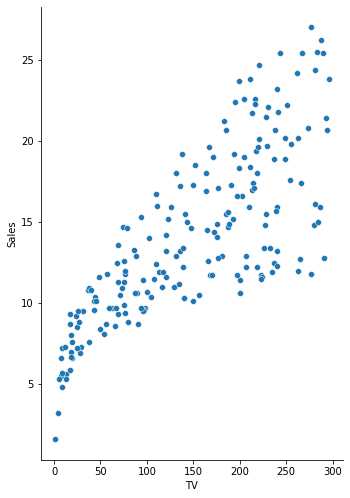

In [7]:
sns.pairplot(advertising, x_vars = ['TV'], 
             y_vars = 'Sales', size = 7, aspect = 0.7,
             kind = 'scatter')

**linear regression 공식**

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response (y target)
-  $c$ is the intercept (절편)
-  $m_1$ is the coefficient for the first feature (1차 상관계수)
-  $m_n$ is the coefficient for the nth feature (n차 상관계수)<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients**(상관계수) or **model parameters**((파라미터).

# 최소제곱법으로 회귀선 구하기

a :  0.04753664043301969 b :  7.032593549127705


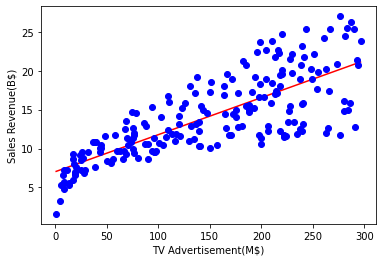

In [8]:
import matplotlib.pyplot as plt

X = advertising.TV
Y = advertising.Sales

# X, Y의 평균
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소제곱법 이용
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a : ', a, 'b : ', b)

# 그래프 그리기
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('TV Advertisement(M$)')
plt.ylabel('Sales Revenue(B$)')
plt.show()

# Model 구축 절차 : sklearn

-  scikit-learn 라이브러리를 사용하려면 X (feature variable)와 y (response variable)를  NumPy 배열(arrays)로 구축

-  X, y를 pandas 데이터프레임으로 전환한다, pandas는 NumPy의 array 기반으로 데이터프레임 쉽게 전환

In [9]:
X = advertising['TV'] # 변수 X
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [10]:
y = advertising['Sales']  # target Y
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.7,
                                                    random_state = 100)

In [12]:
train_test_split?

Signature : **train_test_split(*arrays, **options)**


Docstring :
Split arrays or matrices into random train and test subsets


Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.



---


Parameters
----------
***arrays** : sequence of indexables with same length / shape[0]

    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

**test_size** : float, int or None, optional (default=None)

    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. 
    If int, represents the absolute number of test samples. 
    If None, the value is set to the complement of the train size. 
    If ``train_size`` is also None, it will be set to 0.25.

**train_size** : float, int, or None, (default=None)

    If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. 
    If int, represents the absolute number of train samples.
    If None, the value is automatically set to the complement of the test size.

**random_state** : int, RandomState instance or None, optional (default=None)

    If int, random_state is the seed used by the random number generator;
    If RandomState instance, random_state is the random number generator;
    If None, the random number generator is the RandomState instance used by `np.random`.

**shuffle** : boolean, optional (default=True)

    Whether or not to shuffle the data before splitting. 
    If shuffle=False then stratify must be None.

**stratify** : array-like or None (default=None)

    If not None, data is split in a stratified fashion, using this as
    the class labels.


---



Returns
-------
splitting : list, length=2 * len(arrays)

    List containing train-test split of inputs.
    .. versionadded:: 0.16

        If the input is sparse, the output will be a ``scipy.sparse.csr_matrix``. 
        Else, output type is the same as the input type.
---


In [13]:
print(X_train.shape)
print(X_test.shape)

(140,)
(60,)


In [14]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print

(140,)
(140,)
(60,)
(60,)


<function print>

In [16]:
import numpy as np

X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


In [17]:
list(y)

[22.1,
 10.4,
 9.3,
 18.5,
 12.9,
 7.2,
 11.8,
 13.2,
 4.8,
 10.6,
 8.6,
 17.4,
 9.2,
 9.7,
 19.0,
 22.4,
 12.5,
 24.4,
 11.3,
 14.6,
 18.0,
 12.5,
 5.6,
 15.5,
 9.7,
 12.0,
 15.0,
 15.9,
 18.9,
 10.5,
 21.4,
 11.9,
 9.6,
 17.4,
 9.5,
 12.8,
 25.4,
 14.7,
 10.1,
 21.5,
 16.6,
 17.1,
 20.7,
 12.9,
 8.5,
 14.9,
 10.6,
 23.2,
 14.8,
 9.7,
 11.4,
 10.7,
 22.6,
 21.2,
 20.2,
 23.7,
 5.5,
 13.2,
 23.8,
 18.4,
 8.1,
 24.2,
 15.7,
 14.0,
 18.0,
 9.3,
 9.5,
 13.4,
 18.9,
 22.3,
 18.3,
 12.4,
 8.8,
 11.0,
 17.0,
 8.7,
 6.9,
 14.2,
 5.3,
 11.0,
 11.8,
 12.3,
 11.3,
 13.6,
 21.7,
 15.2,
 12.0,
 16.0,
 12.9,
 16.7,
 11.2,
 7.3,
 19.4,
 22.2,
 11.5,
 16.9,
 11.7,
 15.5,
 25.4,
 17.2,
 11.7,
 23.8,
 14.8,
 14.7,
 20.7,
 19.2,
 7.2,
 8.7,
 5.3,
 19.8,
 13.4,
 21.8,
 14.1,
 15.9,
 14.6,
 12.6,
 12.2,
 9.4,
 15.9,
 6.6,
 15.5,
 7.0,
 11.6,
 15.2,
 19.7,
 10.6,
 6.6,
 8.8,
 24.7,
 9.7,
 1.6,
 12.7,
 5.7,
 19.6,
 10.8,
 11.6,
 9.5,
 20.8,
 9.6,
 20.7,
 10.9,
 19.2,
 20.1,
 10.4,
 11.4,
 10.3,
 13.2,
 25.4

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train

42     293.6
189     18.7
90     134.3
136     25.6
51     100.4
       ...  
106     25.0
14     204.1
92     217.7
179    165.6
102    280.2
Name: TV, Length: 134, dtype: float64

In [19]:
y_train

42     20.7
189     6.7
90     11.2
136     9.5
51     10.7
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: Sales, Length: 134, dtype: float64

In [20]:
X_test

95     163.3
15     195.4
30     292.9
158     11.7
128    220.3
       ...  
97     184.9
31     112.9
12      23.8
35     290.7
119     19.4
Name: TV, Length: 66, dtype: float64

In [21]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
       ... 
97     15.5
31     11.9
12      9.2
35     12.8
119     6.6
Name: Sales, Length: 66, dtype: float64

In [22]:
train_test_split(y, shuffle=False)

[0      22.1
 1      10.4
 2       9.3
 3      18.5
 4      12.9
        ... 
 145    10.3
 146    13.2
 147    25.4
 148    10.9
 149    10.1
 Name: Sales, Length: 150, dtype: float64, 150    16.1
 151    11.6
 152    16.6
 153    19.0
 154    15.6
 155     3.2
 156    15.3
 157    10.1
 158     7.3
 159    12.9
 160    14.4
 161    13.3
 162    14.9
 163    18.0
 164    11.9
 165    11.9
 166     8.0
 167    12.2
 168    17.1
 169    15.0
 170     8.4
 171    14.5
 172     7.6
 173    11.7
 174    11.5
 175    27.0
 176    20.2
 177    11.7
 178    11.8
 179    12.6
 180    10.5
 181    12.2
 182     8.7
 183    26.2
 184    17.6
 185    22.6
 186    10.3
 187    17.3
 188    15.9
 189     6.7
 190    10.8
 191     9.9
 192     5.9
 193    19.6
 194    17.3
 195     7.6
 196     9.7
 197    12.8
 198    25.5
 199    13.4
 Name: Sales, dtype: float64]

linear regression 모델링

In [23]:
X_train1 = X_train.values.reshape(-1, 1)

In [24]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train1, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)



---



# coefficients calculation

In [25]:
lr.intercept_

7.066582521696444

In [26]:
lr.coef_

array([0.04822451])

In [27]:
# intercept(절편), coefficients(상관계수) 출력
print(lr.intercept_)
print(lr.coef_)

7.066582521696444
[0.04822451]


$y = 6.989 + 0.0464 \times TV $<br>

# predictions

* reshape한 값을 새로운 변수에 넣어 줬을 때 정상적으로 실행되었다.

In [28]:
X_test1 = X_test.values.reshape(-1, 1)

In [29]:
y_pred = lr.predict(X_test1)
type(y_pred)

numpy.ndarray

In [30]:
y_pred

array([14.94164546, 16.48965233, 21.19154233,  7.63080932, 17.69044269,
       10.68824343, 17.5216569 ,  9.47780816, 17.79171417, 15.51069472,
        8.58565468,  9.77680014, 18.37523078,  7.32699489, 13.79390206,
       15.2743946 ,  7.41862147, 16.59574625, 10.69788834, 18.51508186,
       18.13410821, 10.33620449,  8.89911401, 19.16611279, 10.39407391,
        9.64659396, 17.36251601, 13.78425716, 11.27176004,  7.47166843,
       16.70184018, 10.40371881, 16.65843812,  7.88157679, 20.60320327,
       18.55366147,  9.39582649, 20.26563168, 12.71849542,  8.39275662,
       12.66062601, 15.60232129,  9.14505902, 10.07096967, 17.86887339,
        8.90875891, 10.47123313, 14.17005326, 12.11086656, 10.74611285,
       10.83773942, 15.18759048,  7.48613578,  7.44273372, 10.7509353 ,
       13.30683448, 10.60626176, 21.03722388,  8.01178297, 16.59574625,
       20.77681152, 15.98329494, 12.51113002,  8.21432593, 21.0854484 ,
        8.00213807])

# matplotlib를 이용한 예측결과 시각화

Text(0, 0.5, 'Sales')

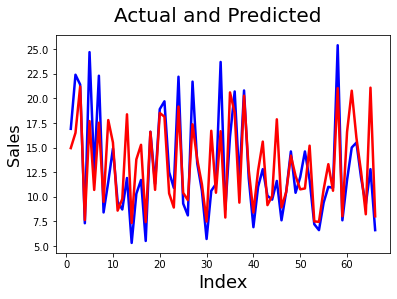

In [31]:
import matplotlib.pyplot as plt

c = [i for i in range(1, 67, 1)]
fig = plt.figure()
plt.plot(c, y_test, color = "blue", linewidth = 2.5, linestyle = "-")
plt.plot(c, y_pred, color = "red", linewidth = 2.5, linestyle = "-")
fig.suptitle('Actual and Predicted', fontsize = 20)
plt.xlabel('Index', fontsize = 18)
plt.ylabel('Sales', fontsize = 16)

error terms

Text(0, 0.5, 'ytest-ypred')

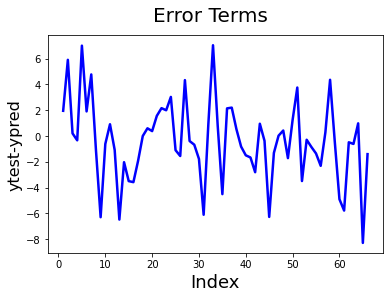

In [32]:
c = [i for i in range(1, 67, 1)]
fig = plt.figure()
plt.plot(c, y_test-y_pred, color = "blue", linewidth = 2.5, linestyle = "-")
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Index', fontsize = 18)
plt.ylabel('ytest-ypred', fontsize = 16)

# evaluation RMSE, R^2 values

In [33]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [34]:
print('Mean_absolute_error : ', mae)
print('Mean_squared_error : ', mse)
print('r_square_value : ', r_squared)

Mean_absolute_error :  2.3033658282608096
Mean_squared_error :  9.712207417121473
r_square_value :  0.6236886078089201
